## Sprawozdanie 1 - Michał Walicki

In [1]:
# import wymaganych modułów
import random

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

## Zadanie 2

In [2]:
# wczytanie pliku csv do pd.DataFrame, 
# kolumna index ustawiona na pierwsza kolumne z pliku
df_iris = pd.read_csv('iris2D.csv', index_col=0)
df_iris

,PC1,PC2
1,-2.406639,-0.396955
2,-2.223539,0.690180
3,-2.581105,0.427542
4,-2.450869,0.686007
5,-2.536853,-0.508252
...,...,...
146,1.585447,-0.481313
147,1.602556,0.859528
148,1.396619,-0.378609
149,1.080993,-1.011558


In [3]:
# klasyfikacja KMEANS
km = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)

In [4]:
# uruchomienie
y_km = km.fit_predict(df_iris)

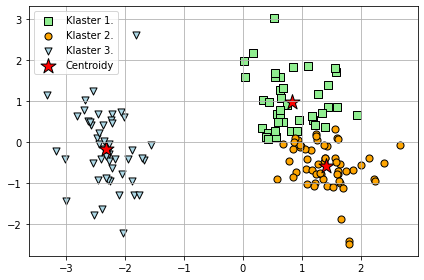

Znieksztalcenie: 100.93740671469274


In [5]:
# przedstawienie na wykresie pierwszego klastra 
plt.scatter(
    df_iris.iloc[y_km == 0, 0],
    df_iris.iloc[y_km == 0, 1],
    s=50,
    c="lightgreen",
    marker="s",
    edgecolor="black",
    label="Klaster 1.",
)

# przedstawienie na wykresie drugiego klastra
plt.scatter(
    df_iris.iloc[y_km == 1, 0],
    df_iris.iloc[y_km == 1, 1],
    s=50,
    c="orange",
    marker="o",
    edgecolor="black",
    label="Klaster 2.",
)

# przedstawienie na wykresie trzeciego klastra
plt.scatter(
    df_iris.iloc[y_km == 2, 0],
    df_iris.iloc[y_km == 2, 1],
    s=50,
    c="lightblue",
    marker="v",
    edgecolor="black",
    label="Klaster 3.",
)

# wywietlenie na wykresie centroidow (w postaci czerwonej gwiazdy)
plt.scatter(
    km.cluster_centers_[:, 0],
    km.cluster_centers_[:, 1],
    s=250,
    marker="*",
    c="red",
    edgecolor="black",
    label="Centroidy",
)

# przygotowanie legendy wykresu
plt.legend(scatterpoints=1)

# ustawienie siatki wykresu
plt.grid()

# wyswietlenie wykresu
plt.tight_layout()
plt.show()

print(f"Znieksztalcenie: {km.inertia_}")


## Zadanie 3

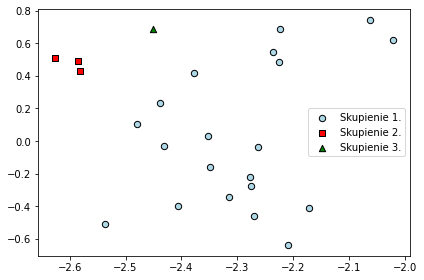

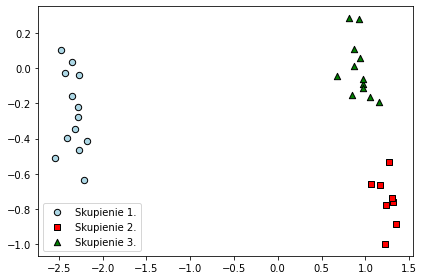

In [6]:
wyniki = []

dbscan1 = DBSCAN(eps=0.2, min_samples=1, metric="euclidean")
dbscan2 = DBSCAN(eps=0.2, min_samples=5, metric="euclidean")
    
for model in (dbscan1, dbscan2):
    
    y_dbscan = model.fit_predict(df_iris)
    wyniki.append(y_dbscan)

    plt.scatter(
    df_iris.iloc[y_dbscan == 0, 0],
    df_iris.iloc[y_dbscan == 0, 1],
    c="lightblue",
    marker="o",
    s=40,
    edgecolor="black",
    label="Skupienie 1.",
    )

    plt.scatter(
        df_iris.iloc[y_dbscan == 1, 0],
        df_iris.iloc[y_dbscan == 1, 1],
        c="red",
        marker="s",
        s=40,
        edgecolor="black",
        label="Skupienie 2.",
    )

    plt.scatter(
        df_iris.iloc[y_dbscan == 2, 0],
        df_iris.iloc[y_dbscan == 2, 1],
        c="green",
        marker="^",
        s=40,
        edgecolor="black",
        label="Skupienie 3.",
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

**Algorytm DBSCAN** (*Density-Based Spatial Clustering of Applications with Noise*) to jeden z
algorytmów klasteryzacji opierający się na łączeniu w grupy regionów o dostatecznie dużej
gęstości. Algorytm wymaga od użytkownika wprowadzenie dwóch parametrów 𝜀 oraz 𝑀𝑖𝑛𝑃𝑡𝑠.
Za otoczenie obiektu ze zbioru danych określa się obszar objęty przez okrąg o promieniu 𝜀.
𝑀𝑖𝑛𝑃𝑡𝑠 określa minimalną ilość punktów potrzebną do utworzenia klastra. (źródło: http://home.agh.edu.pl/~horzyk/pracedyplom/2016%20%C5%81ukasz%20Trojanowski%20praca_magisterska_finalna.pdf)

## Zadanie 4

In [7]:
# tworzenie rozwiązań dla obu algorytmów

# rozwiązania dla DBSCAN już wcześniej utworzyliśmy

# tworzenie rozwiązań dla KMEANS
kmeans_y1 = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0).fit_predict(df_iris)
kmeans_y2 = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-01, random_state=0).fit_predict(df_iris)

a) rand score

In [8]:
# obliczamy rand score dla tej pary rozwiązań DBSCAN
print(f"Rand score dla DBSCAN: {metrics.adjusted_rand_score(wyniki[0], wyniki[1])}")

Rand score dla DBSCAN: 0.02828979119967832


In [9]:
# obliczamy rand score dla tej pary rozwiązań KMEANS
print(f"Rand score dla KMEANS: {metrics.adjusted_rand_score(kmeans_y1, kmeans_y2)}")

Rand score dla KMEANS: 0.7575856047284887


b) purity

In [10]:
def purity_score(y_true, y_pred):
    # autor: https://stackoverflow.com/questions/34047540/python-clustering-purity-metric/51672699#51672699
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [11]:
print(f"Purity dla DBSCAN: {purity_score(wyniki[0], wyniki[1])}")
print(f"Purity dla KMEANS: {purity_score(kmeans_y1, kmeans_y2)}")

Purity dla DBSCAN: 0.46
Purity dla KMEANS: 0.9066666666666666
